# Unsupervised learning of Hillenbrand vowel data
This notebook implements the unsupervised learning of vowel clusters using k-means and Gaussian Mixture Models. The clusters (but not the confidence intervals) are plotted in R via `ggplot2` (`Seaborn` and `Matplotlib` did not have the entirety of the functionality I was looking for).


In order to facilitate the model fitting, the data will be reduced to 2-dimensional vector via PCA.  

A search for 12 clusters was used since that is the total number of vowels in the dataset.

In [1]:
# run setup script
import os

%run '~/GitHub/hillenbrand-vowel-clustering/scripts/hillenbrand-data-setup.py'

# Formant values
First up, using the formant values.

In [2]:
# decomposition via PCA to two components
# doing this for both formants and formant ratios even though 
# this section examines formants only

from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

formant_reduced = pca.fit_transform(formant_mtx)
formant_ratio_reduced = pca.fit_transform(formant_ratio_mtx)

## k-means clustering

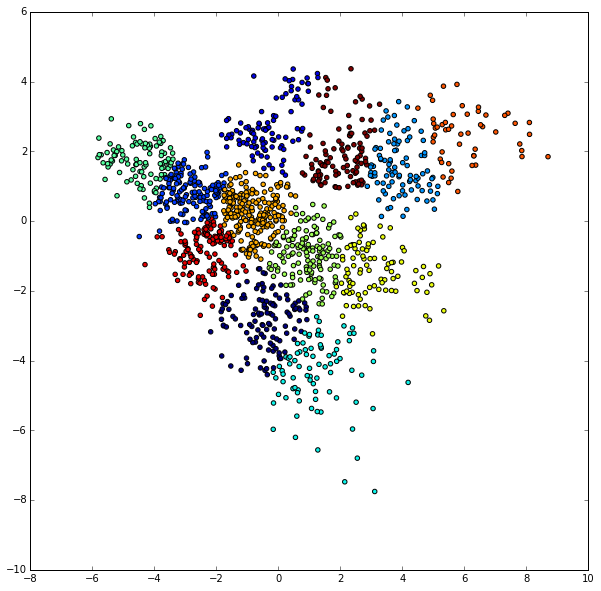

In [3]:
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 10)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 12)

kmeans.fit(formant_reduced)

labels = kmeans.labels_

plt.scatter(formant_reduced[:, 0], formant_reduced[:, 1], \
 c = labels.astype(np.float))

In [4]:
# put reduced data, labels, ground truth, vowel into DataFrame
# plot components against each other
# match target colors to cluster labels

kmeans_data = pd.DataFrame(formant_reduced, columns = ['PC1', 'PC2'])

kmeans_data['Label'] = kmeans.labels_
kmeans_data['Target'] = target_mtx[:, 2]
kmeans_data['Vowel'] = hillenbrand_data.Vowel

mk_dict = OrderedDict()
for vowel in np.unique(kmeans_data.Vowel):
    mk_dict[vowel] = '$' + vowel + '$'
        
kmeans_data['VowelMarker'] = kmeans_data.Vowel.map(mk_dict)

kmeans_data['ID'] = hillenbrand_data.ID
kmeans_data['Sex'] = hillenbrand_data.SexTarget
kmeans_data['Height'] = hillenbrand_data.Height
kmeans_data['Position'] = hillenbrand_data.Position
kmeans_data['Rounding'] = hillenbrand_data.Rounding

kmeans_data.head()

,PC1,PC2,Label,Target,Vowel,VowelMarker,ID,Sex,Height,Position,Rounding
0,-0.244772,-0.513789,8,0,ae,$ae$,m01ae,0,near-open,front,1
1,-1.580423,0.153214,8,0,ae,$ae$,m02ae,0,near-open,front,1
2,-1.543787,-0.601066,10,0,ae,$ae$,m04ae,0,near-open,front,1
3,-1.292932,-0.313958,8,0,ae,$ae$,m06ae,0,near-open,front,1
4,-0.984714,0.434788,8,0,ae,$ae$,m07ae,0,near-open,front,1


## Gaussian mixture models

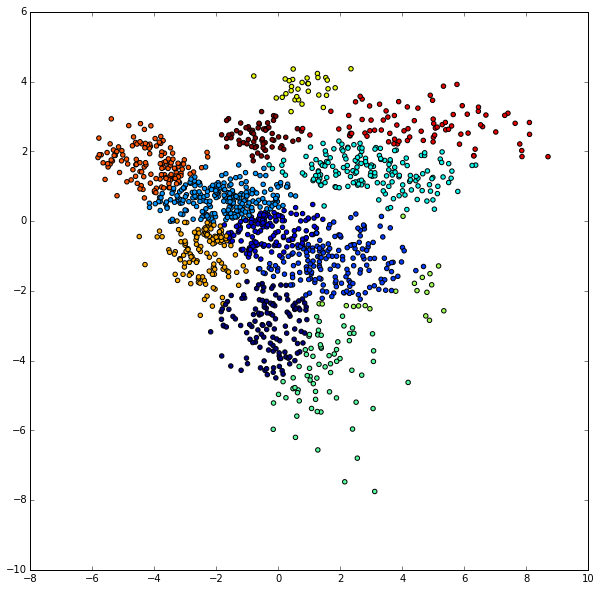

In [5]:
from sklearn.mixture import GMM

gaussmm = GMM(n_components = 12)

gaussmm.fit(formant_reduced)

labels = gaussmm.predict(formant_reduced)

plt.scatter(formant_reduced[:, 0], formant_reduced[:, 1], \
 c = labels.astype(np.float))

In [6]:
gaussmm_data = pd.DataFrame(formant_reduced, columns = ['PC1', 'PC2'])

gaussmm_data['Label'] = gaussmm.predict(formant_reduced)
gaussmm_data['Target'] = target_mtx[:, 2]
gaussmm_data['Vowel'] = hillenbrand_data.Vowel

      
gaussmm_data['VowelMarker'] = gaussmm_data.Vowel.map(mk_dict)

gaussmm_data['ID'] = hillenbrand_data.ID
gaussmm_data['Sex'] = hillenbrand_data.SexTarget
gaussmm_data['Height'] = hillenbrand_data.Height
gaussmm_data['Position'] = hillenbrand_data.Position
gaussmm_data['Rounding'] = hillenbrand_data.Rounding

gaussmm_data.head()

,PC1,PC2,Label,Target,Vowel,VowelMarker,ID,Sex,Height,Position,Rounding
0,-0.244772,-0.513789,1,0,ae,$ae$,m01ae,0,near-open,front,1
1,-1.580423,0.153214,3,0,ae,$ae$,m02ae,0,near-open,front,1
2,-1.543787,-0.601066,1,0,ae,$ae$,m04ae,0,near-open,front,1
3,-1.292932,-0.313958,1,0,ae,$ae$,m06ae,0,near-open,front,1
4,-0.984714,0.434788,3,0,ae,$ae$,m07ae,0,near-open,front,1


In [7]:
# saving to CSV file to use in R

save_path = '~/GitHub/hillenbrand-vowel-clustering/'

kmeans_data.to_csv(os.path.expanduser(save_path + 'hillenbrand-kmeans-formant-data.csv'), Index = False)
gaussmm_data.to_csv(os.path.expanduser(save_path + 'hillenbrand-gaussmm-formant-data.csv'), Index = False)

# Formant ratios

# k-means

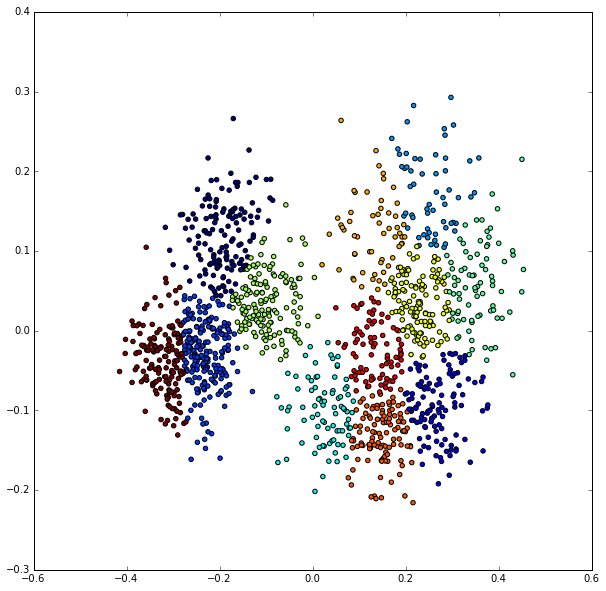

In [8]:
kmeans = KMeans(n_clusters = 12)

kmeans.fit(formant_ratio_reduced)

labels = kmeans.labels_

plt.scatter(formant_ratio_reduced[:, 0], formant_ratio_reduced[:, 1], \
 c = labels.astype(np.float))

In [9]:
# put reduced data, labels, ground truth, vowel into DataFrame
# plot components against each other
# match target colors to cluster labels

kmeans_data = pd.DataFrame(formant_ratio_reduced, columns = ['PC1', 'PC2'])

kmeans_data['Label'] = kmeans.labels_
kmeans_data['Target'] = target_mtx[:, 2]
kmeans_data['Vowel'] = hillenbrand_data.Vowel

mk_dict = OrderedDict()
for vowel in np.unique(kmeans_data.Vowel):
    mk_dict[vowel] = '$' + vowel + '$'
        
kmeans_data['VowelMarker'] = kmeans_data.Vowel.map(mk_dict)

kmeans_data['ID'] = hillenbrand_data.ID
kmeans_data['Sex'] = hillenbrand_data.SexTarget
kmeans_data['Height'] = hillenbrand_data.Height
kmeans_data['Position'] = hillenbrand_data.Position
kmeans_data['Rounding'] = hillenbrand_data.Rounding

kmeans_data.head()

,PC1,PC2,Label,Target,Vowel,VowelMarker,ID,Sex,Height,Position,Rounding
0,-0.148433,0.077068,0,0,ae,$ae$,m01ae,0,near-open,front,1
1,-0.142838,0.082054,0,0,ae,$ae$,m02ae,0,near-open,front,1
2,-0.156992,0.084562,0,0,ae,$ae$,m04ae,0,near-open,front,1
3,-0.115155,0.071240,6,0,ae,$ae$,m06ae,0,near-open,front,1
4,-0.193082,0.056232,0,0,ae,$ae$,m07ae,0,near-open,front,1


## Gaussian mixture models

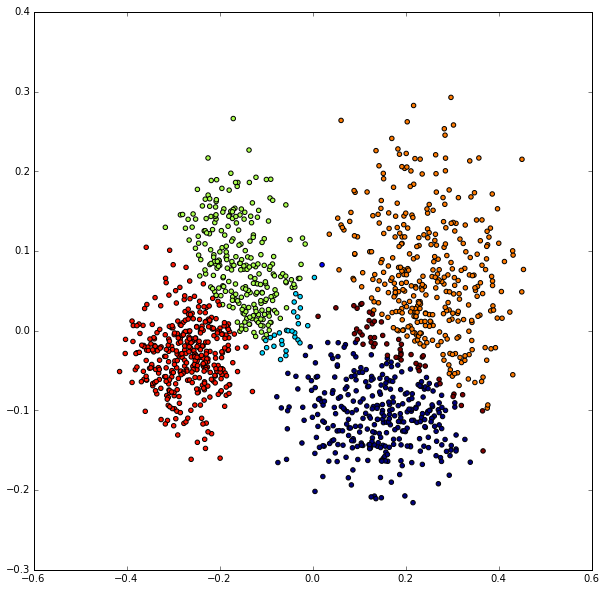

In [10]:
gaussmm = GMM(n_components = 12)

gaussmm.fit(formant_ratio_reduced)

labels = gaussmm.predict(formant_ratio_reduced)

plt.scatter(formant_ratio_reduced[:, 0], formant_ratio_reduced[:, 1], \
 c = labels.astype(np.float))

In [11]:
gaussmm_data = pd.DataFrame(formant_ratio_reduced, columns = ['PC1', 'PC2'])

gaussmm_data['Label'] = gaussmm.predict(formant_ratio_reduced)
gaussmm_data['Target'] = target_mtx[:, 2]
gaussmm_data['Vowel'] = hillenbrand_data.Vowel

      
gaussmm_data['VowelMarker'] = gaussmm_data.Vowel.map(mk_dict)

gaussmm_data['ID'] = hillenbrand_data.ID
gaussmm_data['Sex'] = hillenbrand_data.SexTarget
gaussmm_data['Height'] = hillenbrand_data.Height
gaussmm_data['Position'] = hillenbrand_data.Position
gaussmm_data['Rounding'] = hillenbrand_data.Rounding

gaussmm_data.head()

,PC1,PC2,Label,Target,Vowel,VowelMarker,ID,Sex,Height,Position,Rounding
0,-0.148433,0.077068,5,0,ae,$ae$,m01ae,0,near-open,front,1
1,-0.142838,0.082054,5,0,ae,$ae$,m02ae,0,near-open,front,1
2,-0.156992,0.084562,5,0,ae,$ae$,m04ae,0,near-open,front,1
3,-0.115155,0.071240,5,0,ae,$ae$,m06ae,0,near-open,front,1
4,-0.193082,0.056232,5,0,ae,$ae$,m07ae,0,near-open,front,1


In [12]:
kmeans_data.to_csv(os.path.expanduser(save_path + 'hillenbrand-kmeans-formant-ratio-data.csv'), Index = False)
gaussmm_data.to_csv(os.path.expanduser(save_path + 'hillenbrand-gaussmm-formant-ratio-data.csv'), Index = False)

# Plotting vowel IDs
Since `Seaborn` and `matplotlib` did not have the complete functionality desired, the datasets will be imported into R and the vowel IDs and the clusters they are assigned to will be plotted via `ggplot2`. Though the confidence ellipses could also be plotted, they will not since I am unsure of how `ggplot` and `matplotlib` differ in their calculations.